## Bank Customers Churn Classification with Deep Learning (ANN) 
<b> Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.
    
<b> Goal is to make an Artificial Neural Network that can predict, based on geo-demographical and transactional information given above, if any individual customer will leave the bank or stay (customer churn). Also, rank all the customers of the bank, based on their probability of leaving. 
    
<b> The algorithms included Artificial Neural Network (ANN).

## Step - 1 : Business Problem Understanding
<b> Our Business problem which I have chosen for this tutorial is a classification problem wherein we have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.
    
<b> Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.
    
<b> To make this dataset, the bank gathered information such as customer id, credit score, gender, age, tenure, balance, if the customer is active, has a credit card, etc. During a period of 6 months, the bank observed if these customers left or stayed in the bank.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

import warnings
warnings.simplefilter("ignore")

## Step - 2 : Data Understanding
### 2.1 Data Collection/Loading the dataset
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_csv("Churn_Modelling.csv")

# Display the first 5 lines using the head() method.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.2 Data Understanding
<b> Let’s have a look at data dimensionality.

In [3]:
df.shape

(10000, 14)

<b> From the output, we can see that the table contains 10000 rows and 14 columns.

<b> We can use the info() method to output some general information about the dataframe :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<b> int64, float64 and object are the data types of our features. We see that 11 features are numeric (9 features are int64 + 2 features are float64) and 3 features are categorical. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 10000 observations, the same number of rows we saw before with shape.

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<b> Now use the value_counts method on 'Exited' variable.

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<b> Customers still with the bank are more as compare to Customers exited the bank.

<b> Now use the value_counts method on 'Geography' variable.

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<b> As we can see, the 'Geography' variable having 3 categories, i.e. France, Germany and Spain.

<b> Now use the value_counts method on 'Gender' variable.

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<b> As we can see, the 'Gender' variable having 2 categories, i.e. Male and Female.

<b> Now printing the list of columns (column names) from this dataset.

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Visualization
<b> Visualizing the count of 'exited customers' in the dataset.

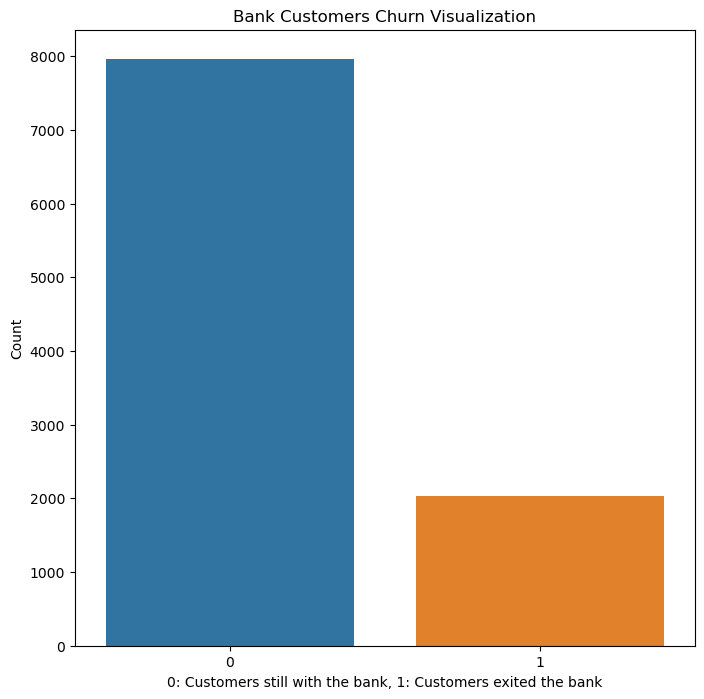

In [10]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))                                                      # Create the figure
sns.countplot(x='Exited', data=df)                                             # Apply the countplot
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')   # xlabel names
plt.ylabel('Count')                                                            # ylabel name
plt.title('Bank Customers Churn Visualization')                                # title name
plt.show()                                                                     # display the plot

<b> Checking the correlation of every pair of features (and the Exited variable), and visualize the correlations using a heatmap.

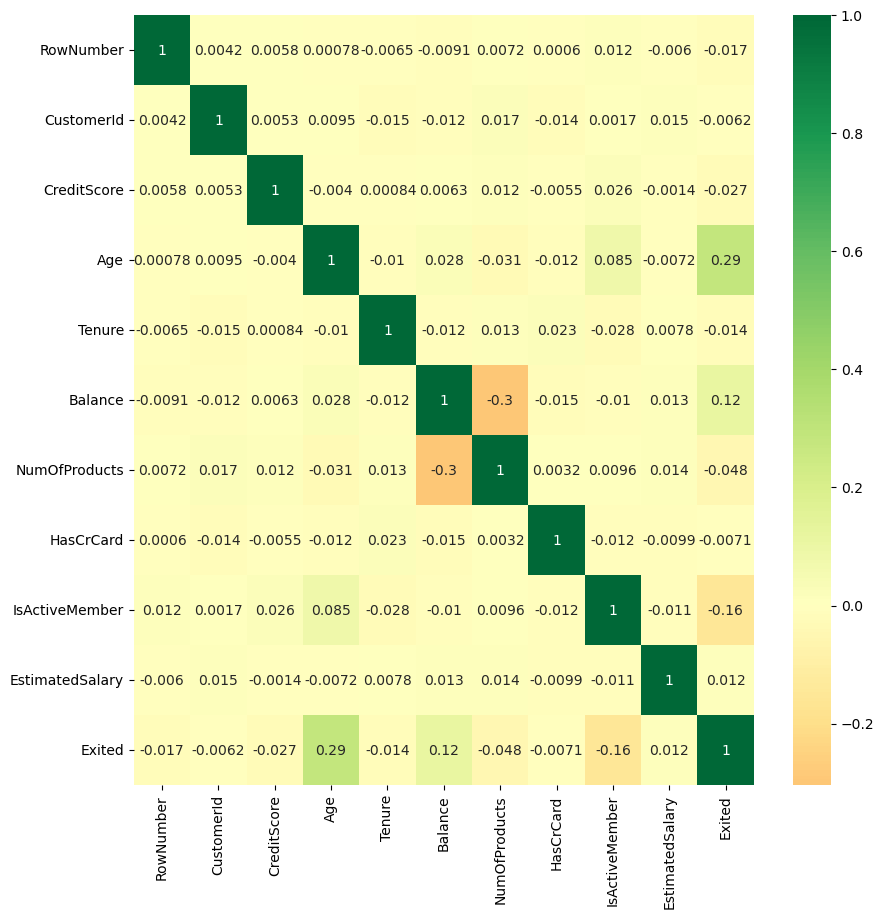

In [11]:
# calculate the correlation between variables and store it in "corr" object.
corr = df.corr()

plt.figure(figsize=(10,10))                                   # Create the figure
sns.heatmap(corr, annot=True, cmap='RdYlGn',center=0)         # plotting correlation heatmap.

# displaying heatmap
plt.show()

### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [12]:
# Check the missing values records.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<b> In the above, we can see that there is no missing values.
    
<b> 'RowNumber', 'CustomerId' and 'Surname' columns are totally unproductive so let's remove them.

In [13]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

<b> After dropping two columns, let's see the shape of the dataset.

In [14]:
df.shape

(10000, 11)

<b> From the output, we can see that the table contains 10000 rows and 11 columns.

### 3.3 Data Wrangling/Feature Engineering
<b> Converting categorical features into numerical features. 
    
<b> As we can see, there are 2 categorical features, i.e. 'Geography' and 'Gender'. Both features are Nominal (Unordered Groups), so here we are converting categorical features into numerical features using get_dummies() function.

In [15]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)       
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [16]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [17]:
# dropping the 'Geography', and 'Gender' original columns from DataFrame.
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

<b> In the above, first we have converted categorical features into numerical features seperatelly and then concatenated those features to original Dataset and finally dropped the original 'Geography', and 'Gender' features from DataFrame, beacuse we have already created numerical features for these features.

### 3.4 Train/Test Split
<b> Creating independent variables as "X" variable: all variables excluding "Exited" variable. And dependent variable "Exited" as "y" variable.

In [18]:
# Create x and y variables.
X = df.drop('Exited', axis=1)     # independent variables
y = df["Exited"]                  # dependent variable

<b> Split the dataset further into train and test sets.

In [19]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of X_train, X_test, y_train, y_test

In [20]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [21]:
y_train.shape, y_test.shape

((8000,), (2000,))

### 3.5 Apply feature scaling to train and test sets of independent features.
<b> Feature Scaling refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale.
    
<b> Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range.
    
<b> So here we are applying feature scaling to train and test sets of independent features by using StandardScaler().

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler           # importing the StandardScaler() class
sc = StandardScaler()                                      # initializing the StandardScaler() class as "sc"
X_train = sc.fit_transform(X_train)                        # Applying the StandardScaler() class on X_train 
X_test = sc.transform(X_test)                              # Applying the StandardScaler() class on X_test

## 4. Modelling / Building Artificial Neural Network (ANN)

<b> sequential model to initialize our ann and dense module to build the layers.
    
<b> The Sequential API is a framework for creating models based on instances of the sequential() class. The model has one input variable, a hidden layer with two neurons, and an output layer with one binary output. Additional layers can be created and added to the model. Things in sequence, or regular order, are arranged sequentially.
    
<b> Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons. The parameters of Dense as:
    
    
- input_dim: dimensionality of the input space.  
    
    
- units: Positive integer, dimensionality of the output space.
    
    
- activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
    
    
- use_bias: Boolean, whether the layer uses a bias vector.
    
    
- kernel_initializer: Initializer for the kernel weights matrix.
    
    
 

In [23]:
# sequential model to initialize our ann and dense module to build the layers

# importing Sequential clas from keras.models library.
from keras.models import Sequential   

# importing Dense clas from keras.layers library.
from keras.layers import Dense

# initialize the ANN - Sequential class as 'ann'
ann = Sequential()

In [24]:
# Adding the input layer and the first hidden layer
ann.add(Dense(input_dim=11, units=6, kernel_initializer='uniform', activation='relu'))

In [25]:
# Adding the second hidden layer
ann.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [26]:
# Adding the output layer
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

<b> Compiling the ANN:

The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase. The parameters of compile as:

- **Loss:** In machine learning, Loss function is used to find error or deviation in the learning process. Keras requires loss function during model compilation process. Keras provides quite a few loss function in the losses module and they are as follows −

    mean_squared_error                                                                                       
    mean_absolute_error                                                                                             
    binary_crossentropy, etc                                                                                       
    
    
- **Optimizer:** In machine learning, Optimization is an important process which optimize the input weights by comparing the prediction and the loss function. Keras provides quite a few optimizer as a module, optimizers and they are as follows:
    
    SGD − Stochastic gradient descent optimizer.                                                                               Adam − Adam optimizer.                                                                                         
    RMSprop − RMSProp optimizer. etc                                                                                  
    
    
- **Metrics:** In machine learning, Metrics is used to evaluate the performance of your model. It is similar to loss function, but not used in training process. Keras provides quite a few metrics as a module, metrics and they are as follows

   accuracy                                                                                                     
   binary_accuracy                                                                                                   
   categorical_accuracy                                                                                                
    

In [27]:
# Compiling the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Fitting the ANN to the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5853 - accuracy: 0.7936
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4239 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8070
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8186
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4170 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.4003 - accuracy: 0.8351
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8349
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8367
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8342
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3997 - accuracy: 0.8347
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8355
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8359
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8354
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8359
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 

<b> In the above, we have Fitted the ANN to the Training set. In the we have used 'batch_size' and 'epochs' as:

- **batch_size:** Number of samples per gradient update. default to 32.
       
    
- **epochs:** Number of epochs to train the model. An epoch is an iteration over the entire `x` and `y` data provided.

## 5. Prediction and Model Evaluation
<b> Predicting the Test set results

In [29]:
# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)                   # if value greater than '0.5' then '1' else '0'

63/63 [==============================] - 0s 2ms/step


<b> Model Evaluation

In [30]:
# Calculate the Accuracy

# importing the accuracy_score class from sklearn.metrics library
from sklearn.metrics import accuracy_score

# print the "The accuracy for ANN model is"
print("The accuracy for ANN model is:", accuracy_score(y_test, y_pred))

The accuracy for ANN model is: 0.841


In [31]:
# Making the Confusion Matrix

# importing the confusion_matrix class from sklearn.metrics library
from sklearn.metrics import confusion_matrix

# apply the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
cm

array([[1541,   54],
       [ 264,  141]], dtype=int64)

<b> From the confusion matrix we have got:
    
- Total correct predictions that customers stay in bank = 1541

    
- Total correct predictions that customers leave the bank = 141

    
- Total incorrect predictions that customers stay in the bank = 264

    
- Total incorrect predictions that customers leave in the bank = 54
    

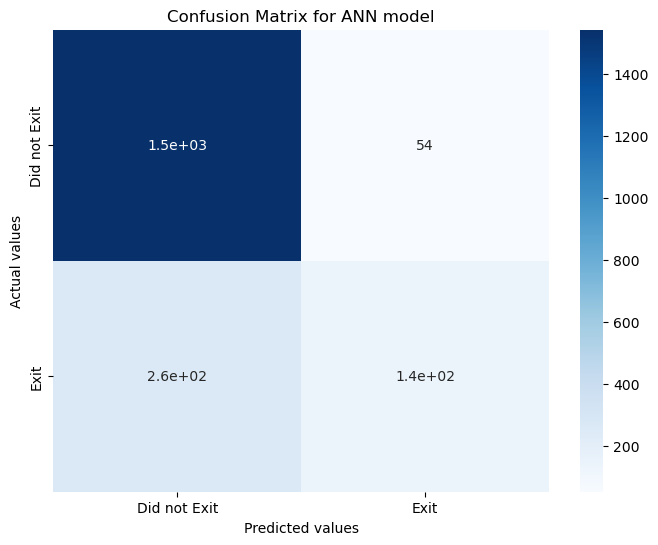

In [32]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

<b> Classification Report

In [33]:
# import classification_report
from sklearn.metrics import classification_report

# print the classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.72      0.35      0.47       405

    accuracy                           0.84      2000
   macro avg       0.79      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



## 6. Evaluation of Multiple Training Instances

In [34]:
# Evaluating, Improving and Tuning the ANN

# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier          # importing the KerasClassifier class
from sklearn.model_selection import cross_val_score              # importing the cross_val_score class
from keras.models import Sequential                              # importing the Sequential class
from keras.layers import Dense                                   # importing the Dense class

# defining the function
def build_classifier():
    ann = Sequential()
    ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann
ann = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100,verbose=0)
accuracies = cross_val_score(estimator = ann, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()


In [35]:
print('Mean accuracy score of 32 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 32 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 32 different models using Kfold cross validation: 0.8429999947547913
Standard Deviation of accuracy score of 32 different models using Kfold cross validation: 0.020419048221683264


<b> Deviation is very low so I'd say that it is unlikely to be an overfitted model. With different training sets it got the mean with all training results is still very close to the above model.

## 7. Improving/Tuning the ANN
<b> Now let’s tune the Hyperparameters to get the values that can help in improving the model. We will be optimizing the following Hyperparameters in the model:

- Number of neurons in each hidden layer
- Activation function
- Optimizer
- Learning rate
- Batch size
- Epoch
- Number of hidden layers
- Regularization layers (Batch normalization, Dropout layer)
    
    
The first hyperparameter to tune is the **number of neurons in each hidden layer**. In this case, the number of neurons in every layer is set to be the same. It also can be made different. The number of neurons should be adjusted to the solution complexity. The task with a more complex level to predict needs more neurons. The number of neurons range is set to be from 10 to 100.

An **activation function** is a parameter in each layer. Input data are fed to the input layer, followed by hidden layers, and the final output layer. The output layer contains the output value. The input values moving from a layer to another layer keep changing according to the activation function. The activation function decides how to compute the input values of a layer into output values. The output values of a layer are then passed to the next layer as input values again. The next layer then computes the values into output values for another layer again. There are 9 activation functions to tune in to this demonstration. Each activation function has its own formula (and graph) to compute the input values.

The layers of a neural network are compiled and an optimizer is assigned. The **optimizer** is responsible to change the learning rate and weights of neurons in the neural network to reach the minimum loss function. Optimizer is very important to achieve the possible highest accuracy or minimum loss. There are 7 optimizers to choose from. Each has a different concept behind it.

One of the hyperparameters in the optimizer is the **learning rate**. We will also tune the learning rate. Learning rate controls the step size for a model to reach the minimum loss function. A higher learning rate makes the model learn faster, but it may miss the minimum loss function and only reach the surrounding of it. A lower learning rate gives a better chance to find a minimum loss function. As a tradeoff lower learning rate needs higher epochs, or more time and memory capacity resources.  
    
If the observation size of the training dataset is too large, it will definitely take a longer time to build the model. To make the model learn faster, we can assign batch size so that not all of the training data are given to the model at the same time. **Batch size** is the number of training data sub-samples for the input. If the training dataset has 77,500 observations and the batch size is 1000, the model will learn 77 times with 1000 training data sub-samples and another last learning from the 500 training data sub-samples. The smaller batch size makes the learning process faster, but the variance of the validation dataset accuracy is higher. A bigger batch size has a slower learning process, but the validation dataset accuracy has a lower variance.
    
The number of times a whole dataset is passed through the neural network model is called an **epoch**. One epoch means that the training dataset is passed forward and backward through the neural network once. A too-small number of epochs results in underfitting because the neural network has not learned much enough. The training dataset needs to pass multiple times or multiple epochs are required. On the other hand, too many epochs will lead to overfitting where the model can predict the data very well, but cannot predict new unseen data well enough. The number of epoch must be tuned to gain the optimal result. This demonstration searches for a suitable number of epochs between 20 to 100.  
    
**Layers in Neural Network** also determine the result of the prediction model. A smaller number of layers is enough for a simpler problem, but a larger number of layers is needed to build a model for a more complicated problem. The number of layers can be tuned using the "for loop" iteration. This demonstration tune the number of layers two times. Each time, the number of layers is tuned between 1 to 3.

Inserting **regularization layers** in a neural network can help prevent overfitting. This demonstration tries to tune whether to add regularization layers or not. There are two regularization layers to use here.

**Batch normalization** is placed after the first hidden layers. The batch normalization layer normalizes the values passed to it for every batch. This is similar to standard scaler in conventional Machine Learning.

Another regularization layer is the Dropout layer. The **dropout layer**, as its name suggests, randomly drops a certain number of neurons in a layer. The dropped neurons are not used anymore. The rate of how much percentage of neurons to drop is set in the dropout rate.
    
    
<b> The following code creates a function for tuning the Neural Network hyperparameters and layers.

In [36]:
# install the bayesian-optimization
!pip install bayesian-optimization

In [37]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [38]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs, 
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=11, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

The following code searches for the optimum hyperparameters and layers for the Neural Network model.

In [39]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=0)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
50/50 [==============================] - 0s 2ms/step
| 1         | 0.592     | 4.939     | 772.2     | 0.6028    | 0.1635    | 53.89     | 2.292     | 1.875     | 0.8929    | 96.73     | 0.3834    | 5.542     |
50/50 [==============================] - 0s 2ms/step
| 2         | 0.7956    | 4.76      | 654.4     | 0.9256    | 0.02131   | 26.97     | 1.04      | 2.665     | 0.7804    | 88.3      | 0.9786    | 5.594     |
50/50 [==============================] - 0s 2ms/step
| 3         | 0.855     | 4.153     | 824.4     | 0.1183    | 0.192     | 31.47     | 2.889     | 2.044     | 0.4205    | 33.81     | 0.7742    | 3.193     |
50/50 [==============================] - 0s 2ms/ste

50/50 [==============================] - 0s 1ms/step
| 16        | 0.8039    | 7.702     | 209.4     | 0.36      | 0.219     | 33.73     | 2.042     | 1.109     | 0.208     | 11.67     | 0.7937    | 1.567     |
50/50 [==============================] - 0s 2ms/step
| 17        | 0.851     | 3.108     | 942.5     | 0.7044    | 0.009552  | 33.18     | 2.243     | 2.154     | 0.2455    | 94.08     | 0.614     | 3.749     |
50/50 [==============================] - 0s 2ms/step
| 18        | 0.445     | 5.309     | 784.1     | 0.3119    | 0.1195    | 36.79     | 1.372     | 2.889     | 0.7422    | 54.14     | 0.2274    | 1.78      |
50/50 [==============================] - 0s 1ms/step
| 19        | 0.796     | 0.5223    | 547.5     | 0.3118    | 0.2089    | 50.22     | 1.359     | 1.049     | 0.07658   | 71.15     | 0.4537    | 3.756     |
50/50 [==============================] - 0s 1ms/step
| 20        | 0.7125    | 8.07      | 992.3     | 0.2169    | 0.1989    | 41.07     | 1.041     | 2.517

In [40]:
# Here are the tuned hyperparameters and layers.

params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'selu',
 'batch_size': 965,
 'dropout': 0.6439901992296374,
 'dropout_rate': 0.1271565145674539,
 'epochs': 69,
 'layers1': 1,
 'layers2': 2,
 'learning_rate': 0.6635718021177582,
 'neurons': 36,
 'normalization': 0.6180154289988415,
 'optimizer': <keras.optimizers.optimizer_v2.adadelta.Adadelta at 0x2c2a0ea3280>}

It has 36 neurons for each layer. There is a batch normalization after the first hidden layer, followed by 1 neuron hidden layer. Next, the Dropout layer drops 12% of the neurons before the values are passed to 3 more neuron hidden layers. Finally, the output layer has one neuron containing the probability value. Now that we have the optimal hyperparameters and layers with the estimated accuracy of 0.8576, let’s fit it into the training dataset. Eventually, we get an accuracy of 0.8576 for the validation dataset. 

Now here we are going to fit the training dataset with best hyper-parameters.

In [41]:
# Fitting Neural Network
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=11, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
        for i in range(params_nn_['layers1']):
            nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
            if params_nn_['dropout'] > 0.5:
                nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
                for i in range(params_nn_['layers2']):
                    nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
                    nn.add(Dense(1, activation='sigmoid'))
                    nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
                    return nn
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)
nn.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1)

Epoch 1/69
9/9 [==============================] - 1s 43ms/step - loss: 0.8148 - accuracy: 0.5759 - val_loss: 0.6199 - val_accuracy: 0.6620
Epoch 2/69
9/9 [==============================] - 0s 13ms/step - loss: 0.6171 - accuracy: 0.6591 - val_loss: 0.5363 - val_accuracy: 0.7210
Epoch 3/69
9/9 [==============================] - 0s 14ms/step - loss: 0.5325 - accuracy: 0.7295 - val_loss: 0.4876 - val_accuracy: 0.7890
Epoch 4/69
9/9 [==============================] - 0s 13ms/step - loss: 0.4981 - accuracy: 0.7585 - val_loss: 0.4605 - val_accuracy: 0.8080
Epoch 5/69
9/9 [==============================] - 0s 14ms/step - loss: 0.4760 - accuracy: 0.7803 - val_loss: 0.4472 - val_accuracy: 0.8050
Epoch 6/69
9/9 [==============================] - 0s 13ms/step - loss: 0.4640 - accuracy: 0.7825 - val_loss: 0.4343 - val_accuracy: 0.8270
Epoch 7/69
9/9 [==============================] - 0s 11ms/step - loss: 0.4535 - accuracy: 0.7941 - val_loss: 0.4275 - val_accuracy: 0.8275
Epoch 8/69
9/9 [===========

9/9 [==============================] - 0s 11ms/step - loss: 0.3438 - accuracy: 0.8576 - val_loss: 0.3357 - val_accuracy: 0.8620
Epoch 60/69
9/9 [==============================] - 0s 11ms/step - loss: 0.3441 - accuracy: 0.8581 - val_loss: 0.3353 - val_accuracy: 0.8635
Epoch 61/69
9/9 [==============================] - 0s 10ms/step - loss: 0.3432 - accuracy: 0.8579 - val_loss: 0.3356 - val_accuracy: 0.8635
Epoch 62/69
9/9 [==============================] - 0s 11ms/step - loss: 0.3426 - accuracy: 0.8586 - val_loss: 0.3376 - val_accuracy: 0.8650
Epoch 63/69
9/9 [==============================] - 0s 11ms/step - loss: 0.3458 - accuracy: 0.8587 - val_loss: 0.3369 - val_accuracy: 0.8630
Epoch 64/69
9/9 [==============================] - 0s 12ms/step - loss: 0.3426 - accuracy: 0.8586 - val_loss: 0.3387 - val_accuracy: 0.8625
Epoch 65/69
9/9 [==============================] - 0s 12ms/step - loss: 0.3460 - accuracy: 0.8558 - val_loss: 0.3371 - val_accuracy: 0.8660
Epoch 66/69
9/9 [===============

<b> From the above, Artificial Neural Network (ANN) with best parameters, we got an accuracy of 86.11%. From the above we conclude that, we have got a good model on train and test data sets with this model.

<b> As we can see that the accuracy of Artificial Neural Network (ANN) with best parameters is higher than the Artificial Neural Network (ANN) with default parameters. 